# Forecasting Energy Demand Using Neural Prophet

Import libraries

In [3]:
import pandas as pd

from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

Load the dataset

In [4]:
df = pd.read_csv("datasets/energy_dataset.csv")
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


Rename and keep only time and actual price column

In [5]:
df = df.rename(columns={'time': 'ds', 'price actual': 'y'})
columns_to_keep = ['ds', 'y']
df = df[columns_to_keep]
df

,ds,y
0,2015-01-01 00:00:00+01:00,65.41
1,2015-01-01 01:00:00+01:00,64.92
2,2015-01-01 02:00:00+01:00,64.48
3,2015-01-01 03:00:00+01:00,59.32
4,2015-01-01 04:00:00+01:00,56.04
...,...,...
35059,2018-12-31 19:00:00+01:00,77.02
35060,2018-12-31 20:00:00+01:00,76.16
35061,2018-12-31 21:00:00+01:00,74.30
35062,2018-12-31 22:00:00+01:00,69.89


Visualize the price

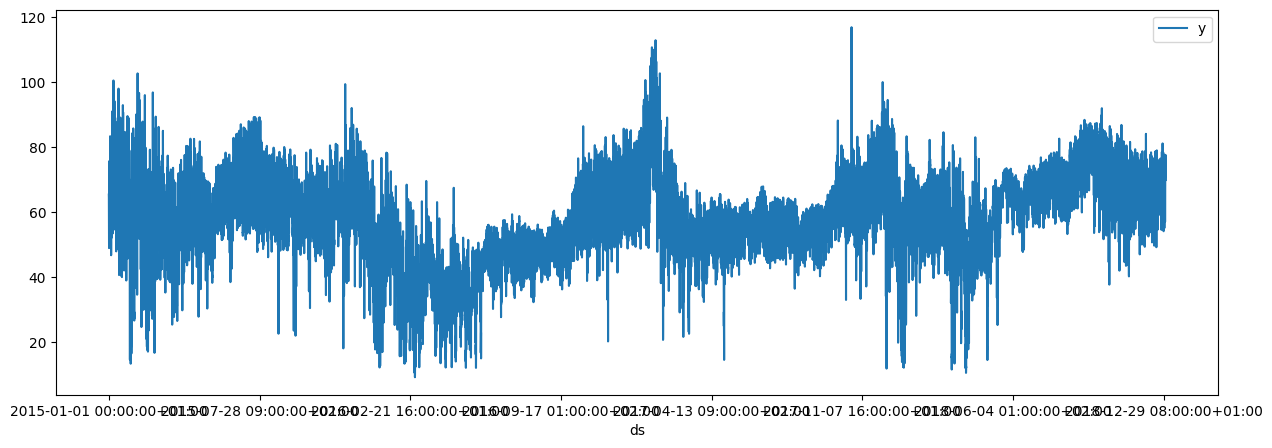

In [6]:
plt = df.plot(x="ds", y="y", figsize=(15, 5))

## Model Training

Fit the Neural Prophet model

In [7]:
m = NeuralProphet(epochs=25)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/263 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Forecast future data

Predicting: 548it [00:00, ?it/s]

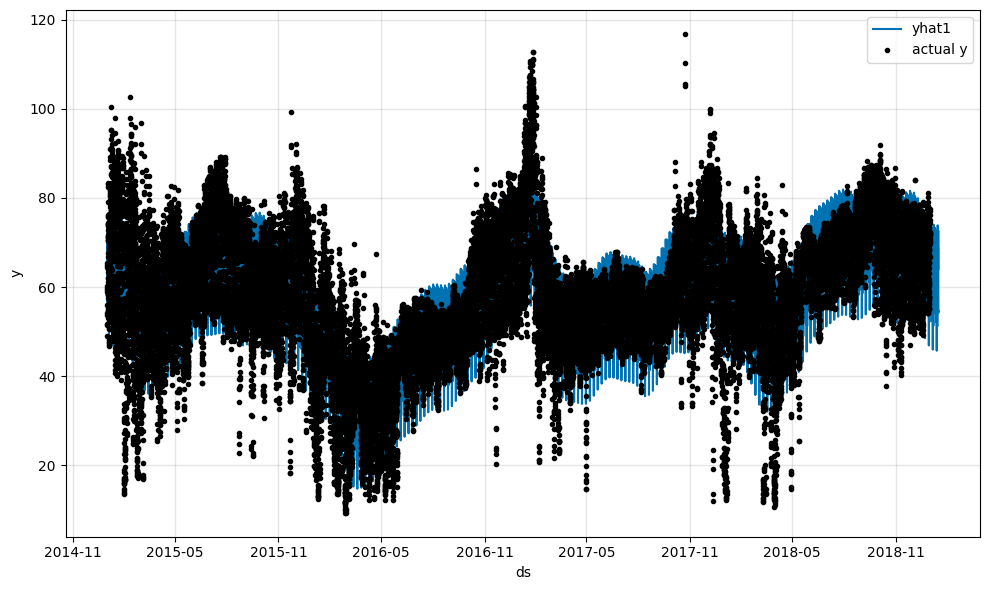

In [8]:
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

forecast = m.predict(df_future)
m.plot(forecast)

Visualize the trend and seasonality

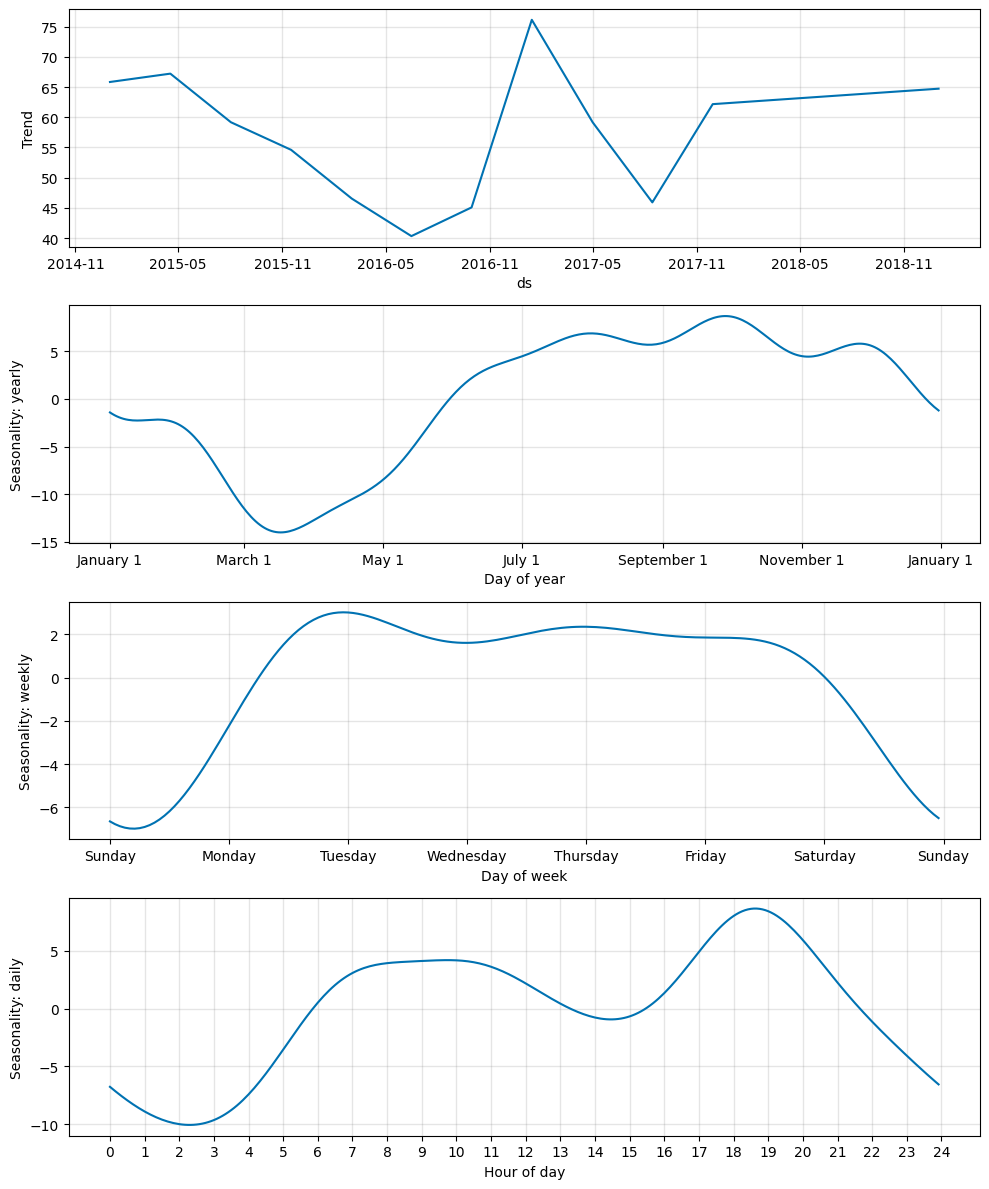

In [9]:
m.plot_parameters(components=["trend", "seasonality"])